# Time series manipulation

Most scientists and engineers, including hydrologists, physisists, electronic engineers, social scientists and economists are often faced with time series that bear information that is to be extracted or to be used in predictions. Pandas has virtually all the tools that are required to handle time series, while keeping dates and data strictly connected. These time series loaded into pandas then form the basis of further analysis.

Loading into pandas can be done with pd.read_csv, pd.read_table, pd.read_excel as we used before as well as with numerous other functions ready to be using in pandas. Just use tab-complition to see al the possibilities

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Show which reading functions pandas has as onboard methods.

We can use a coprehension to select what we want:

In [3]:
[d for d in dir(pd) if d.startswith("read")]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Hence there's a large number of possibilities.

Move to the directory with the examples. Then print pwd to see if you're there.

Notice, the first part of the pwd command will be different on your computer.

In [32]:
cd python/IHEcourse2017/exercises/Apr18/

/Users/Theo/GRWMODELS/python/IHEcourse2017/exercises/Apr18


In [4]:
pwd

'/Users/Theo/GRWMODELS/python/IHEcourse2017/exercises/Apr18'

See if we have a csv datafile, which is a long year groundwater head series in the south of the Netherlands (chosen more or less at random for its length).

In [87]:
ls

B50E0133001_1.csv*    Untitled.ipynb        threeDoorsQuiz.ipynb
B50E0133001_1.xls     sorting.ipynb


It's not a bad habit to use os to verify that the file exists.

In [88]:
import os
os.path.isfile("B50E0133001_1.csv")

True

Ok, now we will naively try to read it in using pd.read_csv. This may fail or not. If it fails we sharpen the knife by adding or using one or more options provided by pd.read_csv.

In [212]:
pb = pd.read_csv("B50E0133001_1.csv")
pb.head()

CParserError: Error tokenizing data. C error: Expected 12 fields in line 12, saw 13


Obviously, the read_csv above failed. Upon inspection of the file in an editor, we see that the top is a mess. Not really, but at least we want to sktip this part and get to the actual time series data of interest further down in the file.

So let's skip a few rows (too few, but we can correct step by step)

In [213]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=9)
pb.head()

,MP:,Meetpunt,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Locatie,Filternummer,Externe aanduiding,X-coordinaat,Y-coordinaat,Maaiveld (cm t.o.v. NAP),Datum maaiveld gemeten,Startdatum,Einddatum,Meetpunt (cm t.o.v. NAP),Meetpunt (cm t.o.v. MV),Bovenkant filter (cm t.o.v. NAP),Onderkant filter (cm t.o.v. NAP)
B50E0133,001,50EP0133,129287,395441,1360,11-03-1955,11-03-1955,10-09-1969,1401,41,-240,-340
B50E0133,001,50EP0133,129287,395441,1360,10-09-1969,10-09-1969,15-02-2011,1401,41,-240,-340
B50E0133,001,50EP0133,129287,395441,1357,15-02-2011,15-02-2011,13-10-2016,1448,91,-240,-340
Locatie,Filternummer,Peildatum,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,NaN,NaN,NaN,NaN,NaN


Ok, we got some top table in the file. See which line pd thought was the header.

Ok. skip a few more lines.

In [95]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=11)
pb.head()

,Locatie,Filternummer,Externe aanduiding,X-coordinaat,Y-coordinaat,Maaiveld (cm t.o.v. NAP),Datum maaiveld gemeten,Startdatum,Einddatum,Meetpunt (cm t.o.v. NAP),Meetpunt (cm t.o.v. MV),Bovenkant filter (cm t.o.v. NAP),Onderkant filter (cm t.o.v. NAP)
0,B50E0133,001,50EP0133,129287,395441,1360,11-03-1955,11-03-1955,10-09-1969,1401.0,41.0,-240.0,-340.0
1,B50E0133,001,50EP0133,129287,395441,1360,10-09-1969,10-09-1969,15-02-2011,1401.0,41.0,-240.0,-340.0
2,B50E0133,001,50EP0133,129287,395441,1357,15-02-2011,15-02-2011,13-10-2016,1448.0,91.0,-240.0,-340.0
3,Locatie,Filternummer,Peildatum,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,NaN,NaN,NaN,NaN,NaN
4,B50E0133,001,11-03-1955,675,634,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we really got the first table in the file, but this is not the one we need. On line 3 we see the desired header line. So skip 3 more lines to get there.

In [75]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15)
pb.head()

,Locatie,Filternummer,Peildatum,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,B50E0133,1,11-03-1955,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1,B50E0133,1,23-03-1955,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
2,B50E0133,1,08-04-1955,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
3,B50E0133,1,22-04-1955,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
4,B50E0133,1,06-05-1955,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


This is fine. At least a good start. But we want "Peildatum" as our index. So:

In [74]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15, index_col="Peildatum")
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
11-03-1955,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
23-03-1955,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
08-04-1955,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
22-04-1955,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
06-05-1955,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


Better, but the idex still consists of strings and not of dates. Therefore, tell read_csv to part the dates:

In [73]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15, index_col="Peildatum", parse_dates=True)
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
1955-11-03,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-03-23,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-08-04,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-22,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-06-05,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


Problem is that some dates will be messed up as pandas will by default interprete dates as mm-dd-yyyyy, while we have dd-mm-yyyy. For some dates this does not matter but for other dates this is ambiguous unless it is specified that the dates start with the day instead of the month.

In [71]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15, index_col="Peildatum", parse_dates=True, dayfirst=True)
pb.head()

In [72]:
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
1955-03-11,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-03-23,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-08,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-22,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-05-06,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


So far so good. Now do some clean-up as we only need the 6th column with the head above national datum. We can tell read_csv what columns to use by specifying a list of headers. First trial

In [99]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15,
                 index_col="Peildatum", parse_dates=True, dayfirst=True,
                usecols=["Stand (cm t.o.v. NAP)"])
pb.head()

ValueError: Index Peildatum invalid

This failed, because we now have to specify all columns we want to use. This should include the columne "Peildatum". So add it to the list.

In [214]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15,
                 index_col="Peildatum", parse_dates=True, dayfirst=True,
                usecols=["Peildatum", "Stand (cm t.o.v. NAP)"])
pb.head()

,Stand (cm t.o.v. NAP)
Peildatum,
1955-03-11,726.0
1955-03-23,733.0
1955-04-08,732.0
1955-04-22,741.0
1955-05-06,750.0


This is fine. We now have a one-column dataFrame with the proper index.

For English speakers, change the column header for better readability.

In [215]:
pb.columns = ["NAP"]
pb.head()

,NAP
Peildatum,
1955-03-11,726.0
1955-03-23,733.0
1955-04-08,732.0
1955-04-22,741.0
1955-05-06,750.0


Check that pb is still a data frame, and only when we select one column from a dataFrame it becomes a series.

In [216]:
print(type(pb))
print(type(pb['NAP']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


So select this column to get a time series.

In [111]:
pb = pb['NAP']
print(type(pb))

<class 'pandas.core.series.Series'>


In [218]:
pb.head(20)

,NAP
Peildatum,
1955-03-11,726.0
1955-03-23,733.0
1955-04-08,732.0
1955-04-22,741.0
1955-05-06,750.0
1955-05-20,751.0
1955-06-03,744.0
1955-06-17,741.0
1955-07-01,662.0


Dataframes and series can immediately be plotted.

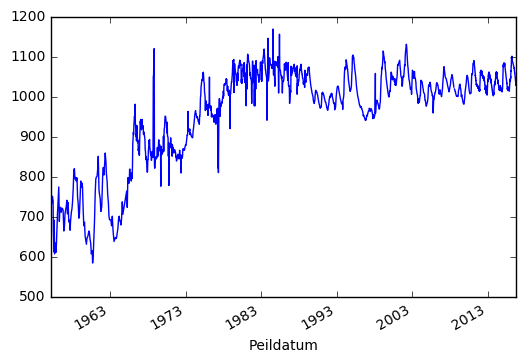

In [114]:
pb.plot()
plt.show()

The next problem is to get the mean of the highest three measurements within each hydrological year, which starts on April 1 and ends at March 31.

This requires resampling the data per hydrologic year.

Which can be done with aliases put in the rule of the resample function of pandas series and dataFrames.

Here are options:

# Offset aliases (previously alled time rules) that can be used or resampling a time series or a dataFrame

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
SM      semi-month end frequency (15th and end of month)
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
SMS     semi-month start frequency (1st and 15th)
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T       minutely frequency
S       secondly frequency
L       milliseonds
U       microseconds
N       nanoseconds

But fo sample at some arbitrary interval we need anchored offsets as the resample rule. Here are the options.

# Anchored offsets

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

For some frequencies you can specify an anchoring suffix:

Alias	Description
W-SUN	weekly frequency (sundays). Same as ‘W’
W-MON	weekly frequency (mondays)
W-TUE	weekly frequency (tuesdays)
W-WED	weekly frequency (wednesdays)
W-THU	weekly frequency (thursdays)
W-FRI	weekly frequency (fridays)
W-SAT	weekly frequency (saturdays)
(B)Q(S)-DEC	quarterly frequency, year ends in December. Same as ‘Q’
(B)Q(S)-JAN	quarterly frequency, year ends in January
(B)Q(S)-FEB	quarterly frequency, year ends in February
(B)Q(S)-MAR	quarterly frequency, year ends in March
(B)Q(S)-APR	quarterly frequency, year ends in April
(B)Q(S)-MAY	quarterly frequency, year ends in May
(B)Q(S)-JUN	quarterly frequency, year ends in June
(B)Q(S)-JUL	quarterly frequency, year ends in July
(B)Q(S)-AUG	quarterly frequency, year ends in August
(B)Q(S)-SEP	quarterly frequency, year ends in September
(B)Q(S)-OCT	quarterly frequency, year ends in October
(B)Q(S)-NOV	quarterly frequency, year ends in November
(B)A(S)-DEC	annual frequency, anchored end of December. Same as ‘A’
(B)A(S)-JAN	annual frequency, anchored end of January
(B)A(S)-FEB	annual frequency, anchored end of February
(B)A(S)-MAR	annual frequency, anchored end of March
(B)A(S)-APR	annual frequency, anchored end of April
(B)A(S)-MAY	annual frequency, anchored end of May
(B)A(S)-JUN	annual frequency, anchored end of June
(B)A(S)-JUL	annual frequency, anchored end of July
(B)A(S)-AUG	annual frequency, anchored end of August
(B)A(S)-SEP	annual frequency, anchored end of September
(B)A(S)-OCT	annual frequency, anchored end of October
(B)A(S)-NOV	annual frequency, anchored end of November

To see this at work. Resample the time series by hydrological year and compute the mean head in every hydrological year. This can be done as follows:

In [182]:
pb.resample("AS-APR").mean()

Peildatum
1954-04-01     729.500000
1955-04-01     685.411765
1956-04-01     706.909091
1957-04-01     722.666667
1958-04-01     766.750000
1959-04-01     681.583333
1960-04-01     669.416667
1961-04-01     780.333333
1962-04-01     761.272727
1963-04-01     665.000000
1964-04-01     708.857143
1965-04-01     824.208333
1966-04-01     909.240000
1967-04-01     875.423077
1968-04-01     885.884615
1969-04-01     870.555556
1970-04-01     895.576923
1971-04-01     856.884615
1972-04-01     865.080000
1973-04-01     915.961538
1974-04-01     970.038462
1975-04-01    1000.518519
1976-04-01     953.807692
1977-04-01     974.884615
1978-04-01    1022.360000
1979-04-01    1065.000000
1980-04-01    1059.296296
1981-04-01    1052.769231
1982-04-01    1062.703704
1983-04-01    1071.518519
                 ...     
1987-04-01    1054.312500
1988-04-01    1050.057143
1989-04-01    1019.481481
1990-04-01     994.576923
1991-04-01     987.076923
1992-04-01     998.923077
1993-04-01    1013.576923
19

This uses Groupby functionality. Which we'll inspect below.

In [190]:
Z = pb.resample("AS-APR")
Z

/Users/Theo/anaconda/lib/python3.5/site-packages/IPython/utils/dir2.py:65: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  canary = getattr(obj, '_ipython_canary_method_should_not_exist_', None)
/Users/Theo/anaconda/lib/python3.5/site-packages/IPython/utils/dir2.py:74: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  m = getattr(obj, name, None)


DatetimeIndexResampler [freq=<YearBegin: month=4>, axis=0, closed=left, label=left, convention=start, base=0]

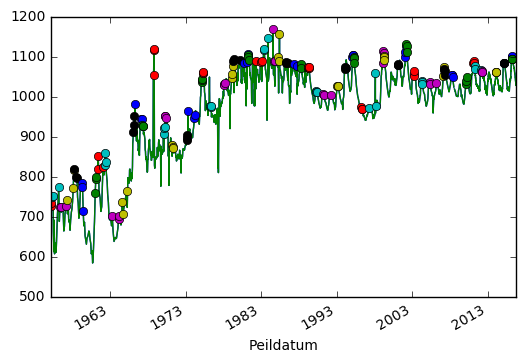

In [191]:
pb.plot()

for z in Z:
    #print(z)
    data = z[-1]
    I    = np.argsort(data)[-3:]
    data[I].plot(marker='o', linestyle="")
plt.show()

In [211]:
pb.plot()

d = list()
y = list()
for z in Z:
    data = z[-1]
    I    = np.argsort(data)[-3:]
    y.append(data.index.year[0])
    d.append(data[I].mean())

pd.Series(d, index=y)

1955     729.500000
1955     758.333333
1956     724.000000
1957     776.000000
1958     805.000000
1959     757.666667
1960     784.333333
1961     831.000000
1962     841.666667
1963     698.666667
1964     735.666667
1965     930.666667
1966     955.666667
1967     927.333333
1968    1096.666667
1969     916.666667
1970     949.666667
1971     874.333333
1972     897.666667
1973     954.666667
1974    1040.000000
1975    1059.666667
1976     975.666667
1977    1031.000000
1978    1059.333333
1979    1091.333333
1980    1092.333333
1981    1098.000000
1982    1088.666667
1983    1127.000000
           ...     
1987    1078.666667
1988    1075.000000
1989    1072.666667
1990    1013.000000
1991    1004.666667
1992    1026.000000
1993    1071.666667
1994    1102.333333
1995    1092.666667
1996     971.666667
1997    1002.000000
1998    1102.666667
1999    1097.333333
2000    1079.666667
2001    1112.000000
2002    1122.666667
2003    1056.666667
2004    1035.333333
2005    1033.333333
